# <u>EDA & Visualization</u>

In [1]:
# ~~~ Imports ~~~
import requests
import json
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# ~~~ Load csv function ~~~
def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df.drop(columns = 'Unnamed: 0').copy()

In [3]:
# ~~~ Create one dimension plot function ~~~
def one_dim_plot(sr, plot_type, axis):
    sr.plot(ax=axis, kind=plot_type)

In [4]:
# ~~~ Load data frames from csv files ~~~
df = load_csv('Virus Full DataFrame.csv')
df_numerical = load_csv('Virus Full DataFrame Numerical.csv')

In [5]:
df

,virus name,species,genus,family,Host plasticity No of species,Host plasticity No of species Impact,Host plasticity No of orders,Host plasticity No of orders Impact,Geography of the host,Geography of the host Impact,...,Proportion of known human pathogens in the viral family Impact,Transmission mode of the virus,Transmission mode of the virus Impact,Animal to human transmission,Animal to human transmission Impact,Human to human transmission,Human to human transmission Impact,Duration of virus species infection in humans,Duration of virus species infection in humans Impact,Risk Score
0,LASSA VIRUS,Lassa mammarenavirus,Mammarenavirus,Arenaviridae,MEDIUM,HIGH,LOW,HIGH,MEDIUM-HIGH,HIGH,...,HIGH,LOW,HIGH,HIGH,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,91
1,HEPATITIS E VIRUS,Orthohepevirus A,Orthohepevirus,Hepeviridae,HIGH,HIGH,MEDIUM-HIGH,HIGH,HIGH,HIGH,...,HIGH,LOW,HIGH,HIGH,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,86
2,EBOLA VIRUS,Zaire ebolavirus,Ebolavirus,Filoviridae,MEDIUM-HIGH,HIGH,MEDIUM,HIGH,HIGH,HIGH,...,HIGH,LOW-MEDIUM,HIGH,HIGH,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,87
3,MARBURG VIRUS,Marburg marburgvirus,Marburgvirus,Filoviridae,MEDIUM-HIGH,HIGH,LOW,HIGH,MEDIUM-HIGH,HIGH,...,HIGH,LOW-MEDIUM,HIGH,HIGH,HIGH,LOW,HIGH,MEDIUM,MEDIUM,86
4,NIPAH VIRUS,Nipah virus,Henipavirus,Paramyxoviridae,MEDIUM-HIGH,HIGH,LOW,HIGH,MEDIUM-HIGH,HIGH,...,HIGH,LOW,HIGH,HIGH,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,PARAMYXOVIRUS PREDICT PMV-132,Paramyxovirus PREDICT PMV-132,Unassigned,Paramyxoviridae,LOW,HIGH,LOW,HIGH,MEDIUM-HIGH,HIGH,...,HIGH,MEDIUM,HIGH,LOW,HIGH,LOW,HIGH,LOW,MEDIUM,42
883,POLYOMAOVIRUS PREDICT PYV-18,Polyomaovirus PREDICT PyV-18,Unassigned,Polyomaviridae,LOW,HIGH,LOW,HIGH,MEDIUM-HIGH,HIGH,...,HIGH,MEDIUM,HIGH,LOW,HIGH,LOW,HIGH,LOW,MEDIUM,45
884,BAT ASTROVIRUS AFCD88,Bat astrovirus AFCD88,Mamastrovirus,Astroviridae,LOW,HIGH,LOW,HIGH,MEDIUM-HIGH,HIGH,...,HIGH,LOW,HIGH,LOW,HIGH,LOW,HIGH,LOW,MEDIUM,42
885,CORONAVIRUS PREDICT COV-96,Coronavirus PREDICT CoV-96,Betacoronavirus,Coronaviridae,LOW,HIGH,LOW,HIGH,MEDIUM,HIGH,...,HIGH,MEDIUM,HIGH,LOW,HIGH,LOW,HIGH,LOW,MEDIUM,41


In [6]:
df_numerical

,virus name,species,genus,family,Host plasticity No of species,Host plasticity No of species Impact,Host plasticity No of orders,Host plasticity No of orders Impact,Geography of the host,Geography of the host Impact,...,Proportion of known human pathogens in the viral family Impact,Transmission mode of the virus,Transmission mode of the virus Impact,Animal to human transmission,Animal to human transmission Impact,Human to human transmission,Human to human transmission Impact,Duration of virus species infection in humans,Duration of virus species infection in humans Impact,Risk Score
0,LASSA VIRUS,Lassa mammarenavirus,Mammarenavirus,Arenaviridae,3,3,1,3,4,3,...,3,1,3,5,3,5,3,3,2,91
1,HEPATITIS E VIRUS,Orthohepevirus A,Orthohepevirus,Hepeviridae,5,3,4,3,5,3,...,3,1,3,5,3,5,3,3,2,86
2,EBOLA VIRUS,Zaire ebolavirus,Ebolavirus,Filoviridae,4,3,3,3,5,3,...,3,2,3,5,3,5,3,3,2,87
3,MARBURG VIRUS,Marburg marburgvirus,Marburgvirus,Filoviridae,4,3,1,3,4,3,...,3,2,3,5,3,1,3,3,2,86
4,NIPAH VIRUS,Nipah virus,Henipavirus,Paramyxoviridae,4,3,1,3,4,3,...,3,1,3,5,3,5,3,3,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,PARAMYXOVIRUS PREDICT PMV-132,Paramyxovirus PREDICT PMV-132,Unassigned,Paramyxoviridae,1,3,1,3,4,3,...,3,3,3,1,3,1,3,1,2,42
883,POLYOMAOVIRUS PREDICT PYV-18,Polyomaovirus PREDICT PyV-18,Unassigned,Polyomaviridae,1,3,1,3,4,3,...,3,3,3,1,3,1,3,1,2,45
884,BAT ASTROVIRUS AFCD88,Bat astrovirus AFCD88,Mamastrovirus,Astroviridae,1,3,1,3,4,3,...,3,1,3,1,3,1,3,1,2,42
885,CORONAVIRUS PREDICT COV-96,Coronavirus PREDICT CoV-96,Betacoronavirus,Coronaviridae,1,3,1,3,3,3,...,3,3,3,1,3,1,3,1,2,41


In [7]:
df_numerical_no_impact = df_numerical.copy()
column_names = df_numerical_no_impact.columns
risk_factor_names = []
for name in column_names:
    if (name.endswith('Impact')):
        df_numerical_no_impact.drop(name, axis='columns', inplace=True)

df_numerical_no_impact

,virus name,species,genus,family,Host plasticity No of species,Host plasticity No of orders,Geography of the host,Number of primary high risk disease transmission interfaces where the virus has been detected,Frequency of interaction between domestic animals and humans in the host ecosystem,Intimacy of interaction between domestic animals and humans in the host ecosystem,...,Proportion of viruses within a viral family that are known to infect more than 1 host species,Epidemicity of the virus species,Geography of the virus in animals,Pandemic virus,Proportion of known human pathogens in the viral family,Transmission mode of the virus,Animal to human transmission,Human to human transmission,Duration of virus species infection in humans,Risk Score
0,LASSA VIRUS,Lassa mammarenavirus,Mammarenavirus,Arenaviridae,3,1,4,1,5,5,...,3,4,3,1,2,1,5,5,3,91
1,HEPATITIS E VIRUS,Orthohepevirus A,Orthohepevirus,Hepeviridae,5,4,5,1,1,1,...,3,4,5,1,2,1,5,5,3,86
2,EBOLA VIRUS,Zaire ebolavirus,Ebolavirus,Filoviridae,4,3,5,3,3,3,...,3,4,3,1,4,2,5,5,3,87
3,MARBURG VIRUS,Marburg marburgvirus,Marburgvirus,Filoviridae,4,1,4,1,5,5,...,3,4,3,1,4,2,5,1,3,86
4,NIPAH VIRUS,Nipah virus,Henipavirus,Paramyxoviridae,4,1,4,1,3,3,...,3,4,4,1,2,1,5,5,3,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,PARAMYXOVIRUS PREDICT PMV-132,Paramyxovirus PREDICT PMV-132,Unassigned,Paramyxoviridae,1,1,4,1,1,1,...,3,1,1,1,2,3,1,1,1,42
883,POLYOMAOVIRUS PREDICT PYV-18,Polyomaovirus PREDICT PyV-18,Unassigned,Polyomaviridae,1,1,4,3,3,3,...,1,1,1,1,1,3,1,1,1,45
884,BAT ASTROVIRUS AFCD88,Bat astrovirus AFCD88,Mamastrovirus,Astroviridae,1,1,4,1,1,1,...,2,1,4,1,1,1,1,1,1,42
885,CORONAVIRUS PREDICT COV-96,Coronavirus PREDICT CoV-96,Betacoronavirus,Coronaviridae,1,1,3,1,1,1,...,3,1,1,1,2,3,1,1,1,41


In [8]:
# ~~~ Create a dataframe excluding 'virus name', 'species', 'genus', 'family' and risk score impact columns  ~~~
df_numerical_limited = df_numerical.copy()
column_names = df_numerical_limited.columns
risk_factor_names = []
for name in column_names:
    if (name.endswith('Impact')):
        df_numerical_limited.drop(name, axis='columns', inplace=True)

df_numerical_limited.drop(df_numerical_limited.iloc[:, 0:4], inplace = True, axis = 1)

df_numerical_limited

#for index, value in enumerate(df_numerical_limited):
#    print(index, value)

,Host plasticity No of species,Host plasticity No of orders,Geography of the host,Number of primary high risk disease transmission interfaces where the virus has been detected,Frequency of interaction between domestic animals and humans in the host ecosystem,Intimacy of interaction between domestic animals and humans in the host ecosystem,Frequency of interaction between wild animals and humans in the host ecosystem,Intimacy of interaction between wild animals and humans in the host ecosystem,Genetic relatedness between the host species and humans,Land use in host ecosystem,...,Proportion of viruses within a viral family that are known to infect more than 1 host species,Epidemicity of the virus species,Geography of the virus in animals,Pandemic virus,Proportion of known human pathogens in the viral family,Transmission mode of the virus,Animal to human transmission,Human to human transmission,Duration of virus species infection in humans,Risk Score
0,3,1,4,1,5,5,3,5,3,5,...,3,4,3,1,2,1,5,5,3,91
1,5,4,5,1,1,1,5,3,3,5,...,3,4,5,1,2,1,5,5,3,86
2,4,3,5,3,3,3,3,3,5,5,...,3,4,3,1,4,2,5,5,3,87
3,4,1,4,1,5,5,3,3,3,5,...,3,4,3,1,4,2,5,1,3,86
4,4,1,4,1,3,3,5,5,3,5,...,3,4,4,1,2,1,5,5,3,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,1,1,4,1,1,1,1,1,3,4,...,3,1,1,1,2,3,1,1,1,42
883,1,1,4,3,3,3,3,3,3,5,...,1,1,1,1,1,3,1,1,1,45
884,1,1,4,1,1,1,1,1,3,4,...,2,1,4,1,1,1,1,1,1,42
885,1,1,3,1,1,1,1,1,3,2,...,3,1,1,1,2,3,1,1,1,41


## Know Your Data!
<b>Our dataset contains the following information for 887 different viruses: 
Name, species, genus, family, risk score, and 31 different risk factors each with different 
impact on the risk score(risk factors are divied into 3 main groups: HOST, ENVIRONMENT and VIRUS).
An explicit detail of each risk factor (And its impact on the total score) could be found here:<b/>

### HOST EPIDEMIOLOGY
#### Host plasticity - No. of species (<font color='red'>High</font> Impact Factor)
- The number of host species the virus is known to infect is an indicator of host diversity. Host species are restricted to mammals (excluding humans), birds, reptiles, and amphibians.

#### Host plasticity - No. of orders (<font color='red'>High</font> Impact Factor)
- The number of host orders the virus is known to infect is an indicator of host breadth. Host orders are restricted to mammals (excluding humans), birds, reptiles, and amphibians.

### HOST ECOLOGY 
#### Geography of the host(s) (<font color='red'>High</font> Impact Factor)
- The global distribution of a species is calculated from the geographic range, country of occurrence and number of WHO regions within which the host species can be found.

#### Number of primary high-risk disease transmission interfaces where the virus has been detected (<font color='red'>High</font> Impact Factor)
- The sum of high-risk disease transmission interfaces where the virus has been detected in a host species. Interfaces are settings where viral spillover/transmission may occur between animals and people.

#### Frequency of interaction between domestic animals and humans in the host ecosystem (<font color='red'>High</font> Impact Factor)
- How often people interact with domestic animals where the virus has been detected in a host species.

#### Intimacy of interaction between domestic animals and humans in the host ecosystem (<font color='red'>High</font> Impact Factor)
- Proximity of interaction between people and domestic animals where the virus has been detected in a host species.

#### Frequency of interaction between wild animals and humans in the host ecosystem (<font color='red'>High</font> Impact Factor)
- How often people interact with wild animals where the virus has been detected in a host species.

#### Intimacy of interaction between wild animals and humans in the host ecosystem (<font color='red'>High</font> Impact Factor)
- Proximity of interaction between people and wild animals where the virus has been detected in a host species.  

### HOST GENETICS 
#### Genetic relatedness between the host species and humans (<font color='red'>High</font> Impact Factor)
- The estimated divergence time (in Million Years Ago, MYA) between the host species and people (Homo sapiens). Divergence time is used as an indicator of genetic relatedness.  

### ENVIRONMENTAL FACTORS 
#### Land use in host ecosystem (<font color='orange'>Medium</font> Impact Factor)
- Primary land use system (urban, forest, crops etc.) where the virus has been detected in a host species.

#### Livestock density in host ecosystem (<font color='orange'>Medium</font> Impact Factor)
- Density of livestock animals where the virus has been detected in a host species.

#### Human population density in host ecosystem (<font color='red'>High</font> Impact Factor)
- Density of people per sqKm where the virus has been detected in a host species.

#### Deforestation in host ecosystem (<font color='orange'>Medium</font> Impact Factor)
- Presence of deforestation where the virus has been detected in a host species. Deforestation is defined as >20% canopy cover change between 2000 and 2017.

#### Urbanization in host ecosystem (<font color='orange'>Medium</font> Impact Factor)
- Presence of urbanization where the virus has been detected in a host species. Urbanization is defined as a location having a >75% probability of urban expansion.

#### Agricultural system change in host ecosystem (<font color='orange'>Medium</font> Impact Factor)
- Presence of agricultural change where the virus has been detected in a host species. Agricultural system change is defined as an increase in pasture/cropland areas between 1970 and 2005.  

### VIRUS GENETICS
#### Genome classification of the virus (<font color='orange'>Medium</font> Impact Factor)
- Genome structure of the virus (DNA or RNA).

#### Envelope status of the virus (<font color='green'>Low</font> Impact Factor)
- The viral genome can be encapsulated by an envelope.

#### Viral genome segmentation (<font color='orange'>Medium</font> Impact Factor)
- The viral genome can be composed of one or more segments.  

### VIRUS EPIDEMIOLOGY
#### Virus species infectivity in humans (<font color='red'>High</font> Impact Factor)
- Detection of a virus species in a human.

#### Virus species infectivity in terrestrial mammals (excluding humans) (<font color='red'>High</font> Impact Factor)
- Detection of a virus species in a terrestrial mammal (excluding humans).

#### Proportion of virus species known to infect humans in the viral family (<font color='red'>High</font> Impact Factor)
- Proportion of virus species within the viral family that have been detected in a human.

#### Proportion of virus species known to infect terrestrial mammals (excluding humans) in the viral family (<font color='orange'>Medium</font> Impact Factor)
- Proportion of virus species within a virus family that have been detected in terrestrial mammals (excluding humans).

#### Proportion of viruses within a viral family that are known to infect more than 1 host species (<font color='orange'>Medium</font> Impact Factor)
- Proportion of virus species within a virus family that have been detected in more than 1 host species (excluding humans).

#### Epidemicity of the virus species (<font color='red'>High</font> Impact Factor)
- Whether the virus species has been implicated in pandemic or epidemic/outbreak events in humans or animals (mammals, birds, reptiles, and amphibians).

#### Geography of the virus in animals (<font color='orange'>Medium</font> Impact Factor)
- Global geographical distribution of virus detection in animals. Detections are restricted to mammals (excluding humans and domesticated species), birds, reptiles, and amphibians. 

#### Pandemic virus (<font color='red'>High</font> Impact Factor)
- Whether the virus has caused a pandemic in humans  

### VIRUS VIROLOGY
#### Proportion of known human pathogens in the viral family (<font color='red'>High</font> Impact Factor)
- Proportion of virus species within a viral family that are known to cause disease in people.

#### Transmission mode of the virus (<font color='red'>High</font> Impact Factor)
- The sum of all transmission modes (i.e. Sexual, Direct, Airborne) within the virus genus.   

### VIRUS ECOLOGY
#### Animal to human transmission (<font color='red'>High</font> Impact Factor)
- Known ability of the virus to transmit between wildlife and people (A zoonotic virus).

#### Human to human transmission (<font color='red'>High</font> Impact Factor)
- Known ability of the virus to transmit between people.

#### Duration of virus species infection in humans (<font color='orange'>Medium</font> Impact Factor)
- Whether the virus species is known to chronically (> 4 weeks) or acutely (< 4 weeks) infect people.    

In [9]:
df_numerical_limited.describe()

,Host plasticity No of species,Host plasticity No of orders,Geography of the host,Number of primary high risk disease transmission interfaces where the virus has been detected,Frequency of interaction between domestic animals and humans in the host ecosystem,Intimacy of interaction between domestic animals and humans in the host ecosystem,Frequency of interaction between wild animals and humans in the host ecosystem,Intimacy of interaction between wild animals and humans in the host ecosystem,Genetic relatedness between the host species and humans,Land use in host ecosystem,...,Proportion of viruses within a viral family that are known to infect more than 1 host species,Epidemicity of the virus species,Geography of the virus in animals,Pandemic virus,Proportion of known human pathogens in the viral family,Transmission mode of the virus,Animal to human transmission,Human to human transmission,Duration of virus species infection in humans,Risk Score
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,...,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,1.382187,1.042841,4.190530,2.396843,3.248027,3.236753,2.977452,3.281849,3.249154,4.180383,...,2.218715,1.059752,1.569335,1.004510,1.561443,2.073281,1.171364,1.090192,1.162345,56.108230
std,0.837495,0.256676,0.562966,0.912857,0.902363,0.892837,0.833517,0.894893,0.465439,0.862525,...,0.729551,0.437819,1.030837,0.134307,0.560556,0.983060,0.810451,0.594163,0.601561,7.930255
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000
25%,1.000000,1.000000,4.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,51.000000
50%,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,55.000000
75%,1.000000,1.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,...,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,60.000000
max,5.000000,4.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,5.000000,5.000000,5.000000,4.000000,3.000000,5.000000,5.000000,5.000000,91.000000


## Risk Scores Distribution 

Text(0, 0.5, '# Of Viruses')

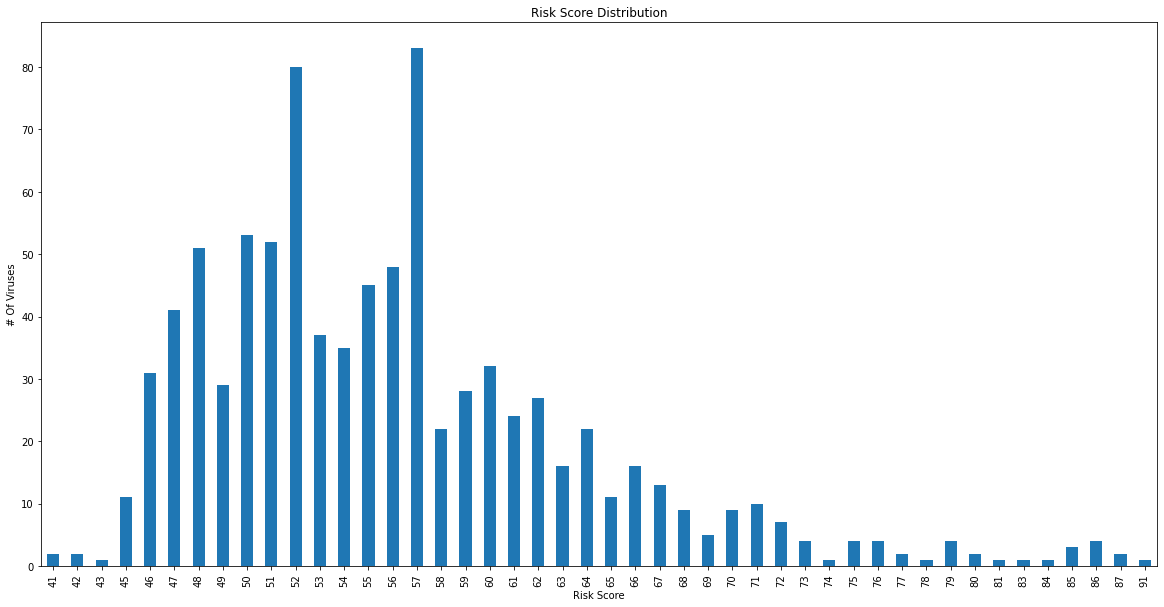

In [10]:
df['Risk Score'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('# Of Viruses')

## Risk factors VS Risk Scores - Line Graphs
- In this section we would like to see the impact of different risk factors on the virus's risk score.
For every given risk factor we grouped by it's possible values and calculated a mean values dataframe, from this dataframe 
we took the 'Risk Score' column series and displayed it on a graph. 

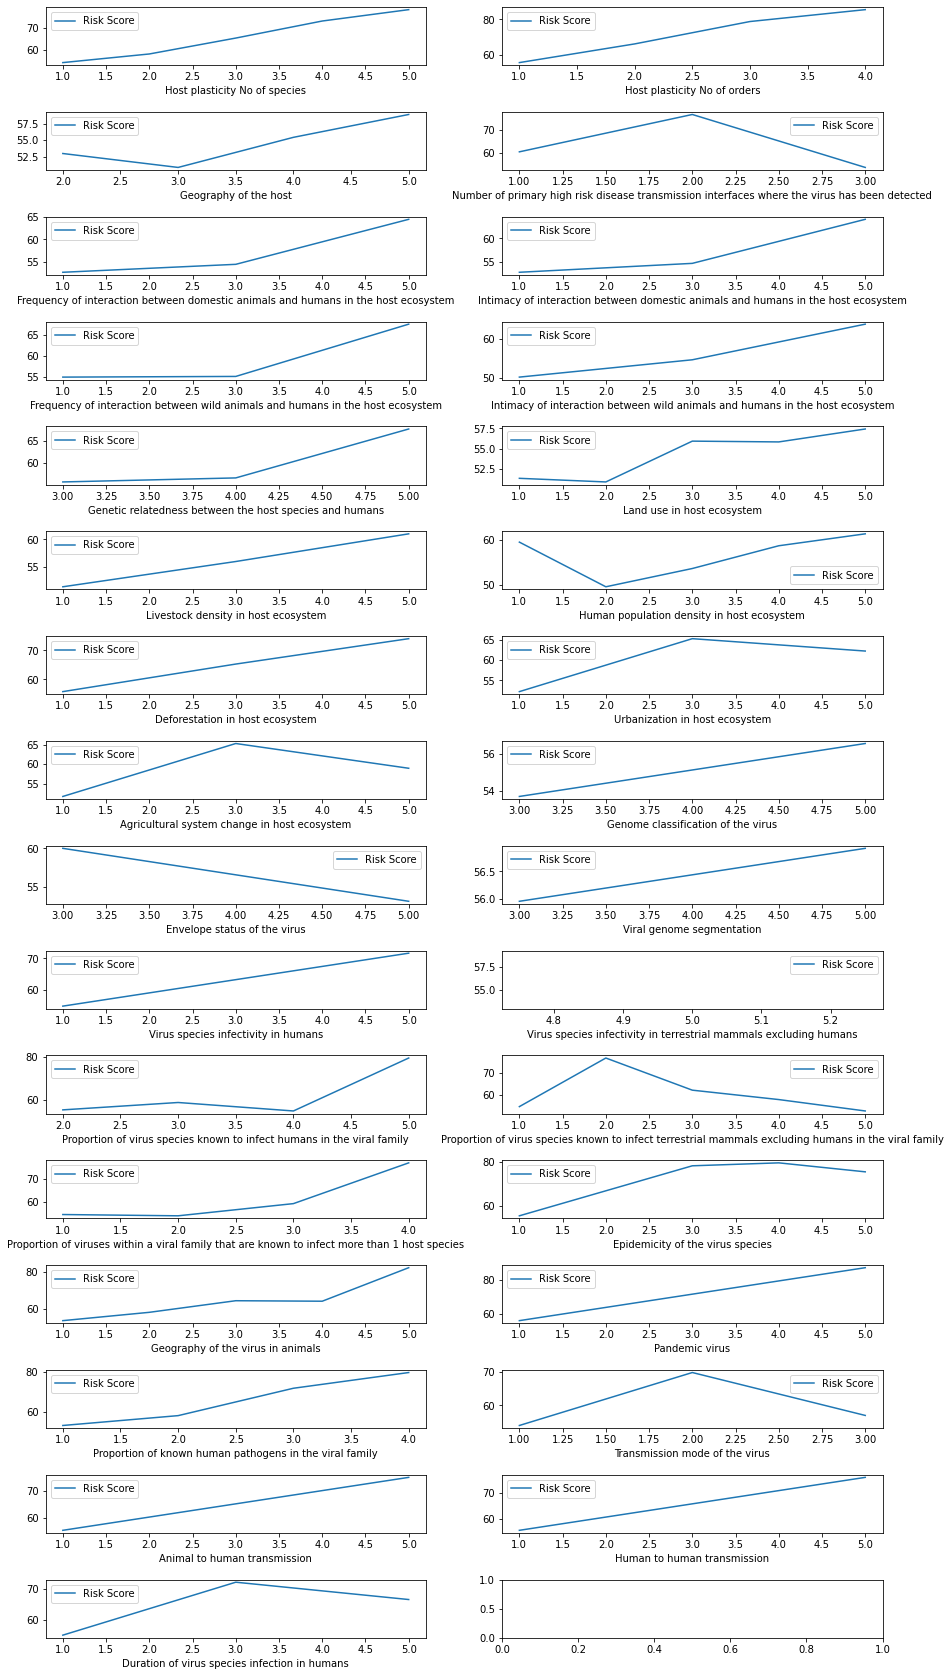

In [11]:
fig, axs = plt.subplots(16,2, figsize=(15, 30))
fig.subplots_adjust(hspace = 0.8, wspace= .2)

axs = axs.ravel()

for i in range(31):
    virus_lineplot = df_numerical_limited.groupby(df_numerical_limited.columns[i]).mean()[['Risk Score']]
    one_dim_plot(virus_lineplot, 'line', axs[i])

## Risk Factors Distribution - Box Plots
* In this section we will see the data risk distribution of all viruses per risk factor using box plots.
* The risk factors are גivide into 3 main groups: HOST, ENVIRONMENT and VIRUS.

### <u>HOST FACTORS - Box Plots<u/>  

In [12]:
# ~~~ Create a list of risk factor names ~~~
column_names = df.columns
risk_factor_names = []
for name in column_names:
    if not(name.endswith('Impact')):
        risk_factor_names.append(name)
        
del risk_factor_names[0:4]   # Remove 'virus name', 'species', 'genus' & 'family' 
del risk_factor_names[31]    # Remove 'Risk Score'

Text(0, 0.5, 'Risk Factors')

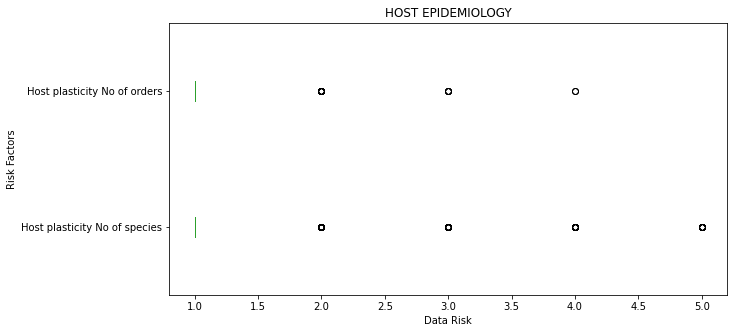

In [13]:
box_plot_df = df_numerical_limited.loc[:, :risk_factor_names[1]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('HOST EPIDEMIOLOGY')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

Text(0, 0.5, 'Risk Factors')

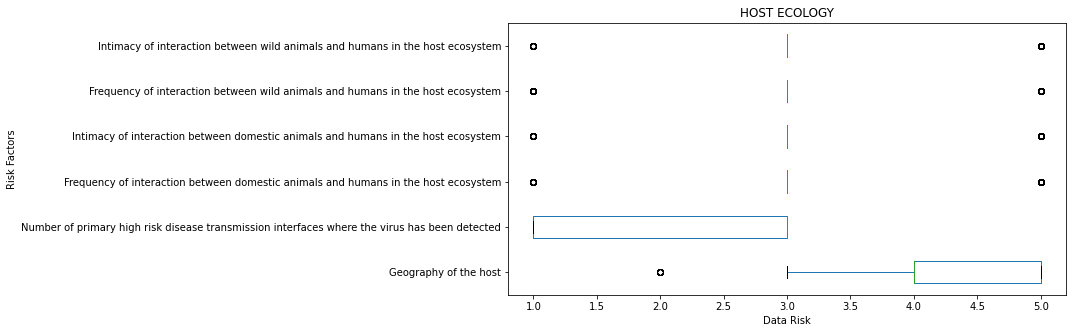

In [14]:
box_plot_df = df_numerical_limited.loc[:, risk_factor_names[2]:risk_factor_names[7]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('HOST ECOLOGY')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

Text(0, 0.5, 'Risk Factors')

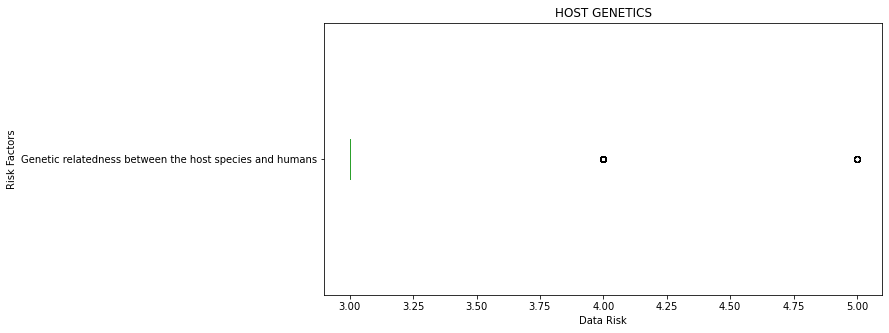

In [15]:
box_plot_df = df_numerical_limited.loc[:, risk_factor_names[8]:risk_factor_names[8]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('HOST GENETICS')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

## <u>ENVIRONMENTAL FACTORS - Box Plots<u/>  

Text(0, 0.5, 'Risk Factors')

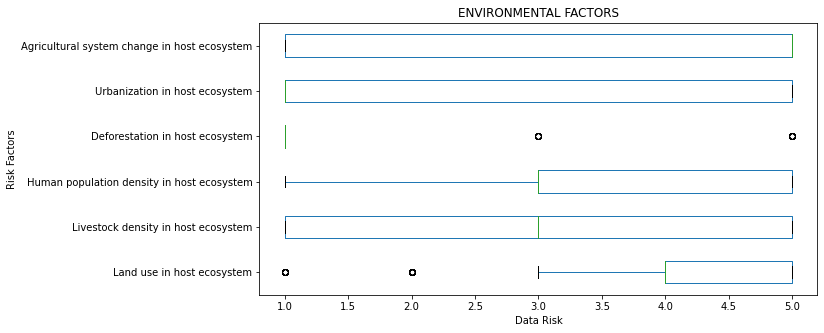

In [16]:
box_plot_df = df_numerical_limited.loc[:, risk_factor_names[9]:risk_factor_names[14]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('ENVIRONMENTAL FACTORS')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

## <u>VIRUS FACTORS - Box Plots<u/>   

Text(0, 0.5, 'Risk Factors')

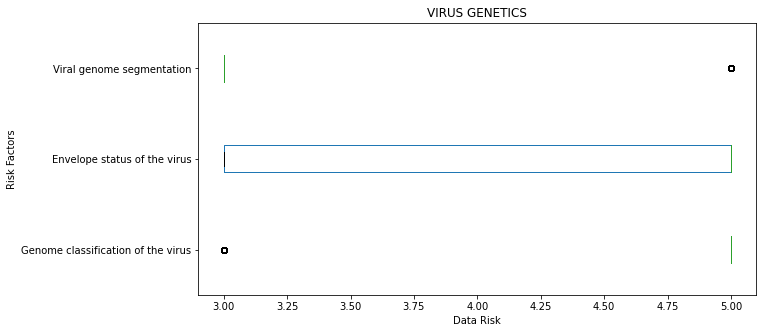

In [17]:
box_plot_df = df_numerical_limited.loc[:, risk_factor_names[15]:risk_factor_names[17]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('VIRUS GENETICS')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

Text(0, 0.5, 'Risk Factors')

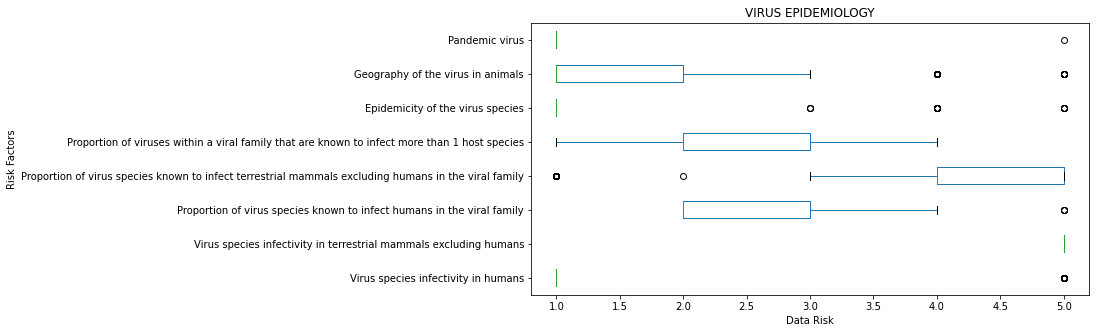

In [18]:
box_plot_df = df_numerical_limited.loc[:, risk_factor_names[18]:risk_factor_names[25]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('VIRUS EPIDEMIOLOGY')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

Text(0, 0.5, 'Risk Factors')

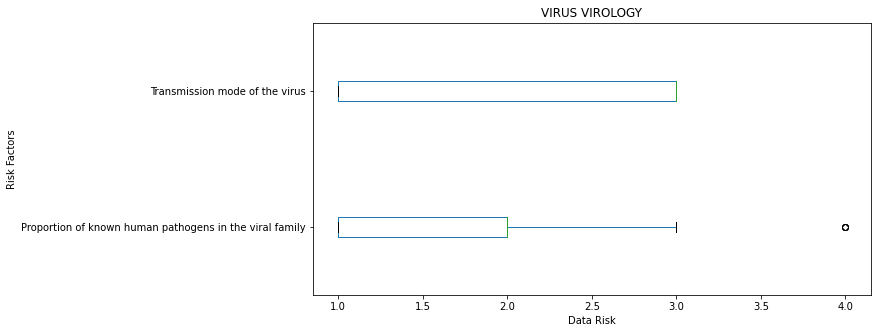

In [19]:
box_plot_df = df_numerical_limited.loc[:, risk_factor_names[26]:risk_factor_names[27]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('VIRUS VIROLOGY')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

Text(0, 0.5, 'Risk Factors')

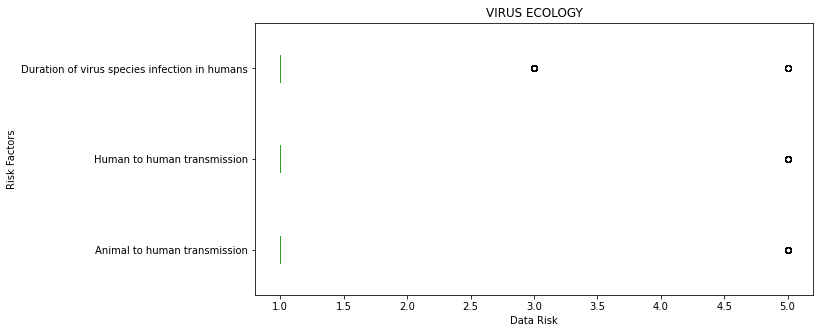

In [20]:
box_plot_df = df_numerical_limited.loc[:, risk_factor_names[28]:risk_factor_names[30]].copy()

box_plot_df.plot(kind='box', vert = False, figsize=(10,5))
plt.title('VIRUS ECOLOGY')
plt.xlabel('Data Risk')
plt.ylabel('Risk Factors')

## Risk factors distribution - Bar graphs
* In the next few bar graphs we will go trough groups of risk factors, and see how our viruses data base divids.
* We will see the count of viruses which are rated: 'LOW', 'LOW-MEDIUM', 'MEDIUM', 'MEDIUM-HIGH', 'HIGH' per risk factor.
* An explicit detail of each risk factor appears below the graph (And its impact on the total score).

### <u>HOST FACTORS - Bar Graphs<u/> 

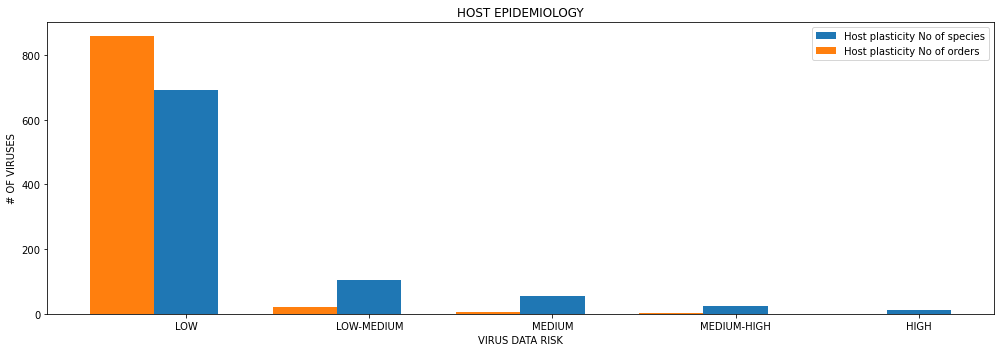

In [21]:
fig, ax = plt.subplots(figsize=(14,5))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 2 

x = np.arange(0, len(temp_dict.keys()))  # the label locations
width = 0.35  # the width of the bars

for i in range(2):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i] = ax.bar(x - (i)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('HOST EPIDEMIOLOGY')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

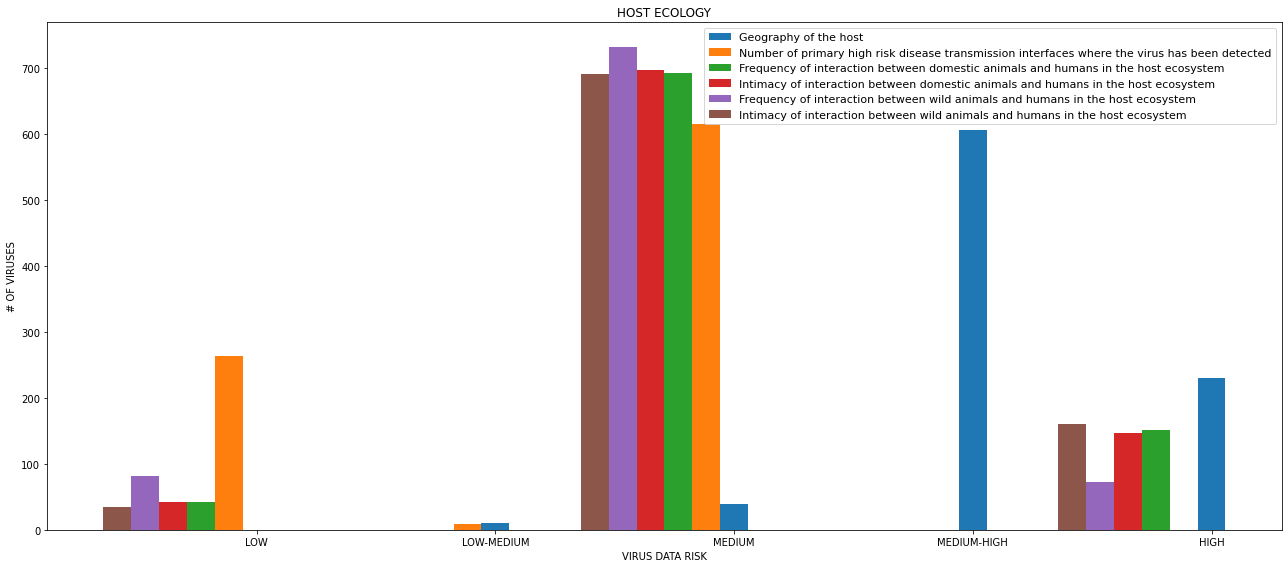

In [22]:
fig, ax = plt.subplots(figsize=(18,8))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 6 

x = np.arange(0, len(temp_dict.keys())*3, 3)  # the label locations
width = 0.35  # the width of the bars

for i in range(2, 8):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i-2] = ax.bar(x - (i-2)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('HOST ECOLOGY')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend(prop={'size': 11})

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

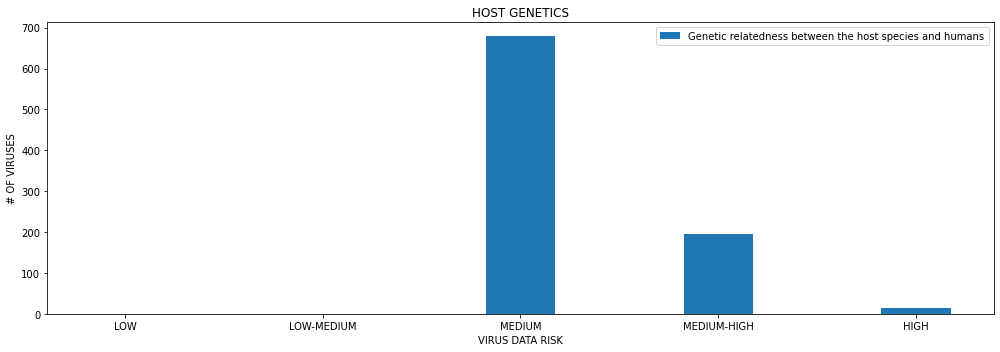

In [23]:
fig, ax = plt.subplots(figsize=(14,5))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 1 

x = np.arange(0, len(temp_dict.keys()))  # the label locations
width = 0.35  # the width of the bars

for i in range(8, 9):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i-8] = ax.bar(x - (i-8)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('HOST GENETICS')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

## <u>ENVIRONMENTAL FACTORS - Bar Graphs<u/> 

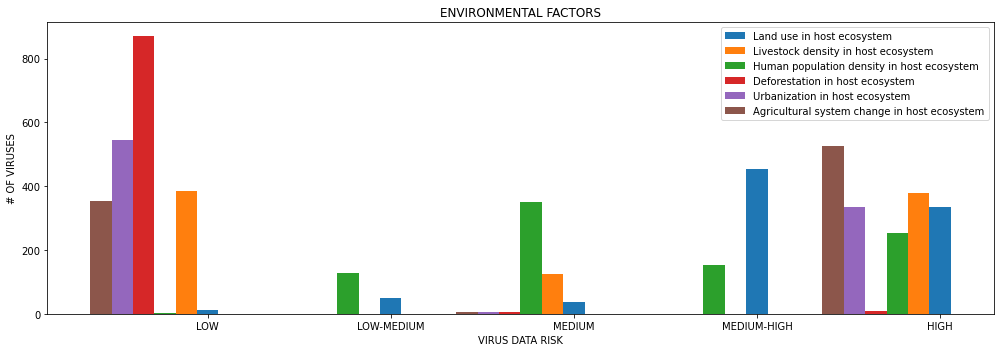

In [24]:
fig, ax = plt.subplots(figsize=(14,5))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 6 

x = np.arange(0, len(temp_dict.keys())*3, 3)  # the label locations
width = 0.35  # the width of the bars

for i in range(9, 15):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i-9] = ax.bar(x - (i-9)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('ENVIRONMENTAL FACTORS')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

## <u>VIRUS FACTORS - Bar Graphs<u/>   

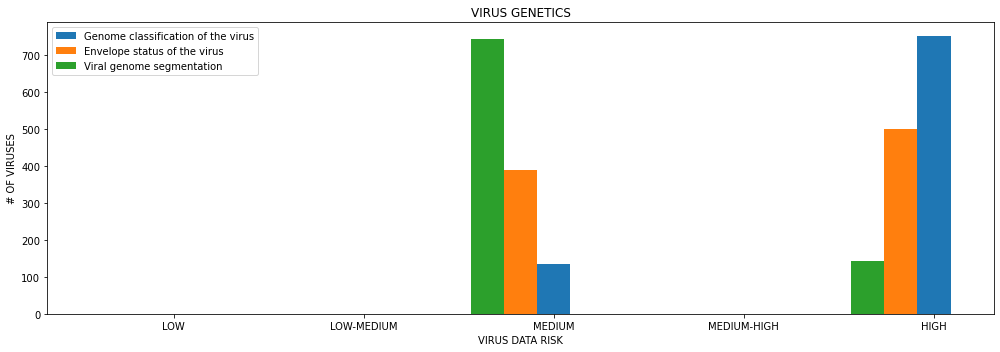

In [25]:
fig, ax = plt.subplots(figsize=(14,5))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 3 

x = np.arange(0, len(temp_dict.keys())*2, 2)  # the label locations
width = 0.35  # the width of the bars

for i in range(15, 18):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i-15] = ax.bar(x - (i-15)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('VIRUS GENETICS')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

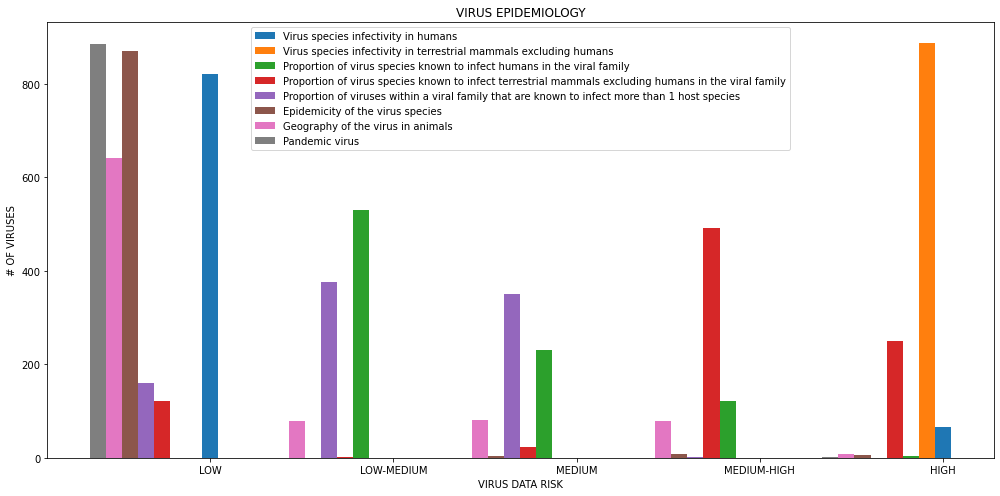

In [26]:
fig, ax = plt.subplots(figsize=(14,7))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 8 

x = np.arange(0, len(temp_dict.keys())*4, 4)  # the label locations
width = 0.35  # the width of the bars

for i in range(18, 26):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i-18] = ax.bar(x - (i-18)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('VIRUS EPIDEMIOLOGY')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

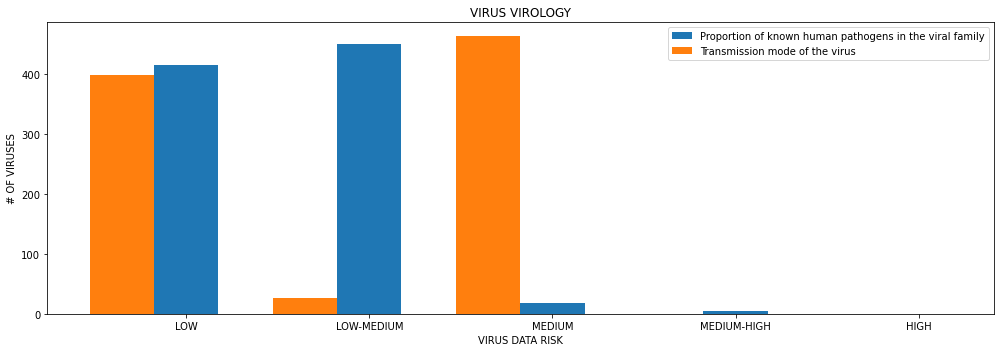

In [27]:
fig, ax = plt.subplots(figsize=(14,5))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 2 

x = np.arange(0, len(temp_dict.keys()))  # the label locations
width = 0.35  # the width of the bars

for i in range(26, 28):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i-26] = ax.bar(x - (i-26)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('VIRUS VIROLOGY')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

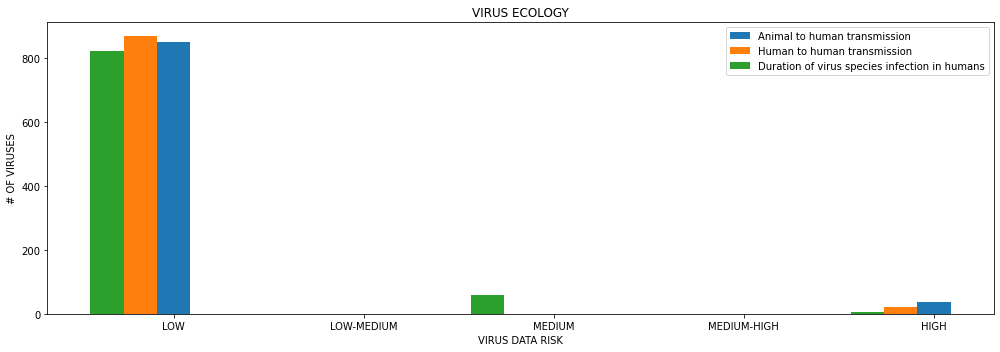

In [28]:
fig, ax = plt.subplots(figsize=(14,5))
temp_dict = {'LOW':0, 'LOW-MEDIUM':0, 'MEDIUM':0, 'MEDIUM-HIGH':0, 'HIGH':0}
rects = [None] * 3 

x = np.arange(0, len(temp_dict.keys())*2, 2)  # the label locations
width = 0.35  # the width of the bars

for i in range(28, 31):      
    risk_dict = df[risk_factor_names[i]].value_counts().to_dict()
    temp_dict = temp_dict.fromkeys(temp_dict, 0)
    for key, value in risk_dict.items():
        temp_dict[key] = value    
        
    rects[i-28] = ax.bar(x - (i-28)*(width), temp_dict.values(), width, label=risk_factor_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# OF VIRUSES')
ax.set_xlabel('VIRUS DATA RISK')
ax.set_title('VIRUS ECOLOGY')
ax.set_xticks(x)
ax.set_xticklabels(temp_dict.keys())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

# Draft 

In [29]:
ct = pd.crosstab(df['Risk Score'], df['Human to human transmission'])
ct

Human to human transmission,HIGH,LOW
Risk Score,,
41,0,2
42,0,2
43,0,1
45,0,11
46,0,31
47,0,41
48,0,51
49,0,29
50,0,53


Text(0, 0.5, '# Of Viruses')

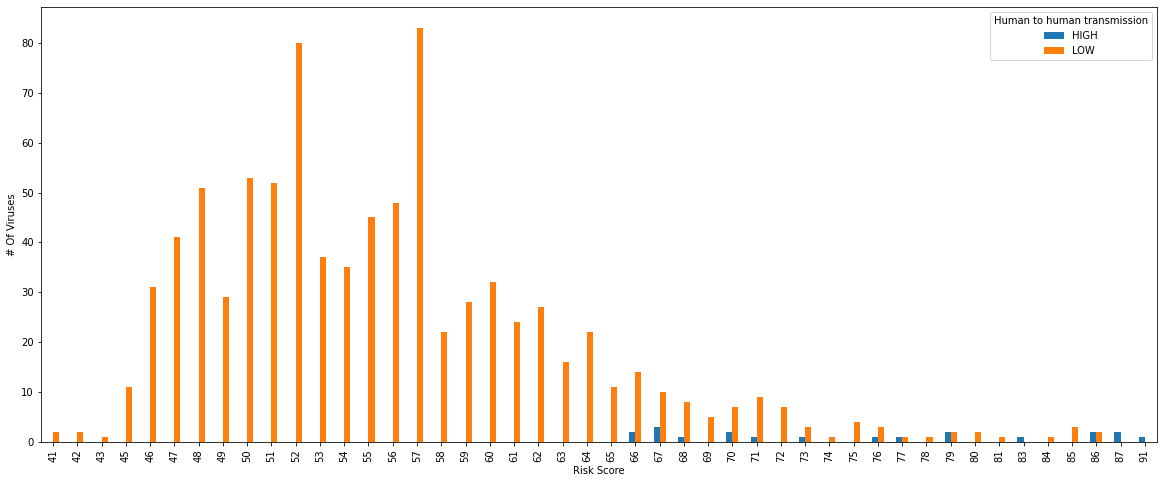

In [30]:
ct.plot(kind='bar', figsize=(20,8))
plt.title('', fontsize=10)
plt.xlabel('Risk Score')
plt.ylabel('# Of Viruses')

In [31]:
#y = df['Risk Score'].copy()
#X = df.drop(df.iloc[:, 66:], axis = 1)
#X = X.drop(X.iloc[:, 0:4], axis = 1)
#
#ct = pd.crosstab(y, X)
##ct = pd.crosstab(df['Risk Score'], df['Human to human transmission'])
#ct

<AxesSubplot:xlabel='Animal to human transmission', ylabel='Risk Score'>

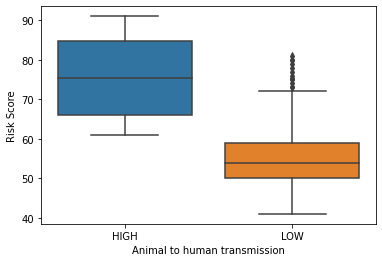

In [32]:
sns.boxplot(x=df['Animal to human transmission'], y=df['Risk Score'])

<AxesSubplot:xlabel='Geography of the virus in animals', ylabel='Risk Score'>

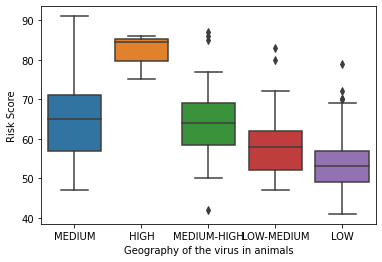

In [33]:
sns.boxplot(x=df['Geography of the virus in animals'], y=df['Risk Score'])

In [34]:
ct = pd.crosstab(df['Risk Score'], df['Animal to human transmission'], normalize='index')
ct

Animal to human transmission,HIGH,LOW
Risk Score,,
41,0.000000,1.000000
42,0.000000,1.000000
43,0.000000,1.000000
45,0.000000,1.000000
46,0.000000,1.000000
47,0.000000,1.000000
48,0.000000,1.000000
49,0.000000,1.000000
50,0.000000,1.000000


Text(0, 0.5, '# Of Viruses')

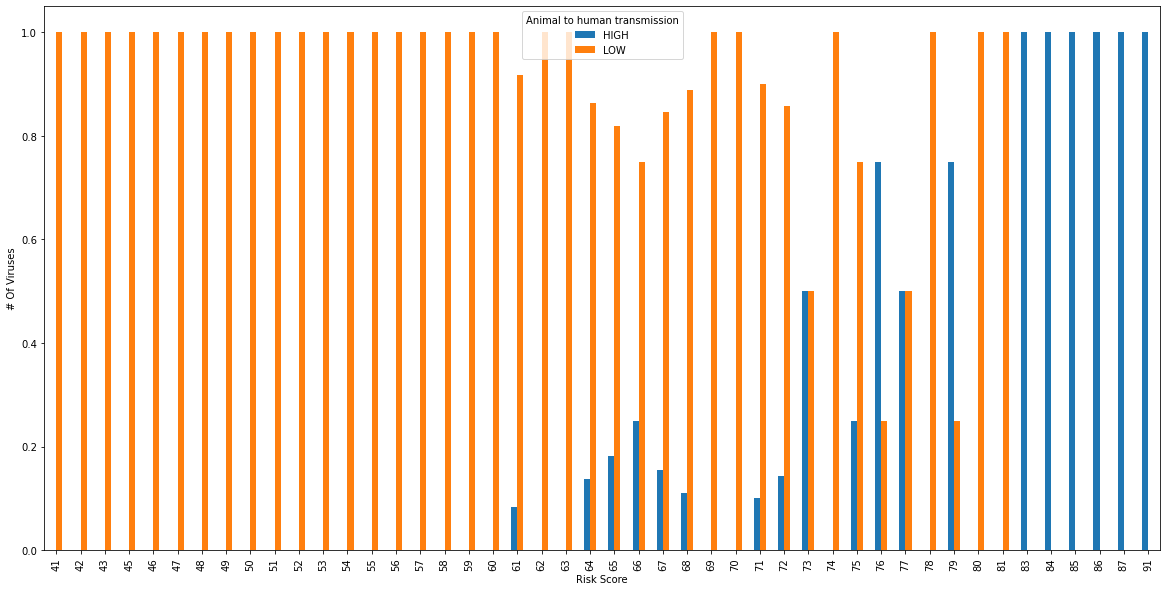

In [35]:
ct.plot(kind='bar', figsize=(20,10))
plt.xlabel('Risk Score')
plt.ylabel('# Of Viruses')

In [36]:
df['Epidemicity of the virus species'].value_counts()

LOW            870
MEDIUM-HIGH      9
HIGH             5
MEDIUM           3
Name: Epidemicity of the virus species, dtype: int64

In [37]:
for index, value in enumerate(df['Epidemicity of the virus species']):
    if (value=='MEDIUM' or value=='MEDIUM-HIGH' or value=='HIGH'):
        print('Epidemicity value: ' + str(value) + ',  Risk Score: ' + str(df['Risk Score'][index]))

Epidemicity value: MEDIUM-HIGH,  Risk Score: 91
Epidemicity value: MEDIUM-HIGH,  Risk Score: 86
Epidemicity value: MEDIUM-HIGH,  Risk Score: 87
Epidemicity value: MEDIUM-HIGH,  Risk Score: 86
Epidemicity value: MEDIUM-HIGH,  Risk Score: 86
Epidemicity value: HIGH,  Risk Score: 87
Epidemicity value: MEDIUM,  Risk Score: 85
Epidemicity value: HIGH,  Risk Score: 83
Epidemicity value: MEDIUM,  Risk Score: 77
Epidemicity value: HIGH,  Risk Score: 80
Epidemicity value: MEDIUM-HIGH,  Risk Score: 76
Epidemicity value: MEDIUM-HIGH,  Risk Score: 72
Epidemicity value: HIGH,  Risk Score: 71
Epidemicity value: MEDIUM,  Risk Score: 73
Epidemicity value: MEDIUM-HIGH,  Risk Score: 66
Epidemicity value: MEDIUM-HIGH,  Risk Score: 67
Epidemicity value: HIGH,  Risk Score: 57


In [38]:
# ~~~ Create a list of risk factor names ~~~
df_numerical_limited = df_numerical.copy()
column_names = df_numerical_limited.columns
risk_factor_names = []
for name in column_names:
    if (name.endswith('Impact')):
        df_numerical_limited.drop(name, axis='columns', inplace=True)

df_numerical_limited.drop(df_numerical_limited.iloc[:, 0:4], inplace = True, axis = 1)

for index, value in enumerate(df_numerical_limited):
    print(index, value)

0 Host plasticity No of species
1 Host plasticity No of orders
2 Geography of the host
3 Number of primary high risk disease transmission interfaces where the virus has been detected
4 Frequency of interaction between domestic animals and humans in the host ecosystem
5 Intimacy of interaction between domestic animals and humans in the host ecosystem
6 Frequency of interaction between wild animals and humans in the host ecosystem
7 Intimacy of interaction between wild animals and humans in the host ecosystem
8 Genetic relatedness between the host species and humans
9 Land use in host ecosystem
10 Livestock density in host ecosystem
11 Human population density in host ecosystem
12 Deforestation in host ecosystem
13 Urbanization in host ecosystem
14 Agricultural system change in host ecosystem
15 Genome classification of the virus
16 Envelope status of the virus
17 Viral genome segmentation
18 Virus species infectivity in humans
19 Virus species infectivity in terrestrial mammals excludin

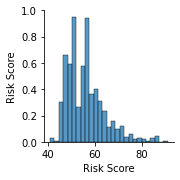

In [39]:
sns.pairplot(df[['Risk Score', 'Host plasticity No of species', 'Geography of the host']])